<a href="https://colab.research.google.com/github/318281029SBH/Escuela/blob/main/Payment_LReg_and_ScoringCards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Carga de datos

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Examen1/train_default.csv',sep='|')

In [ ]:
df.isna().sum()

,0
CUSTOMER_ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [ ]:
tgt= 'default.payment.next.month'
um='CUSTOMER_ID'

#Conjuntos de entrenamiento y prueba

In [ ]:
X_train=df.drop(tgt,axis=1)
y_train=df[tgt]

In [ ]:
y_train.value_counts(1)

,proportion
default.payment.next.month,
0,0.775644
1,0.224356


##OverSampling

In [ ]:
var=[col for col in df.columns if col not in tgt]

In [ ]:
ros= RandomOverSampler(random_state=0)
X_ros,y_ros=ros.fit_resample(X_train[var],y_train)
# Combine X_ros and y_r0s into a single DataFrame
data_ros = pd.concat([X_ros, y_ros], axis=1)

In [ ]:
data_ros[tgt].value_counts(1)

,proportion
default.payment.next.month,
0,0.5
1,0.5


In [ ]:
data_ros.columns

Index(['CUSTOMER_ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

#Cat_variables

CAT_VARIABLES

In [ ]:
df.columns

Index(['CUSTOMER_ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
var_ord= ['AGE','LIMIT_BAL','BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
          'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
var_cat = [col for col in list(df.columns) if col not in var_ord+[tgt]+[um]]

In [ ]:
def freq(df, var):

    if type(var) != list:
        var = [var]
    for v in var:
        #v = 'state'
        aux = df[v].value_counts().to_frame().rename(columns={'count':'FA'})
        aux['FR'] = aux['FA'] / aux['FA'].sum()
        aux[['FAA','FRA']] = aux.apply(  np.cumsum )
        print(f"La variable: {v}")
        display(aux)
        print("\n")

In [ ]:
freq(data_ros, var_cat)

La variable: SEX


,FA,FR,FAA,FRA
SEX,,,,
2,5013,0.57449,5013,0.57449
1,3713,0.42551,8726,1.00000




La variable: EDUCATION


,FA,FR,FAA,FRA
EDUCATION,,,,
2,4241,0.486019,4241,0.486019
1,2921,0.334747,7162,0.820766
3,1471,0.168577,8633,0.989342
5,60,0.006876,8693,0.996218
4,25,0.002865,8718,0.999083
6,5,0.000573,8723,0.999656
0,3,0.000344,8726,1.000000




La variable: MARRIAGE


,FA,FR,FAA,FRA
MARRIAGE,,,,
2,4559,0.522462,4559,0.522462
1,4052,0.464359,8611,0.986821
3,96,0.011002,8707,0.997823
0,19,0.002177,8726,1.000000




La variable: PAY_0


,FA,FR,FAA,FRA
PAY_0,,,,
0,3582,0.410497,3582,0.410497
-1,1493,0.171098,5075,0.581595
2,1413,0.161930,6488,0.743525
1,1314,0.150584,7802,0.894110
-2,682,0.078157,8484,0.972267
3,165,0.018909,8649,0.991176
4,35,0.004011,8684,0.995187
8,18,0.002063,8702,0.997250
6,12,0.001375,8714,0.998625




La variable: PAY_2


,FA,FR,FAA,FRA
PAY_2,,,,
0,4032,0.462067,4032,0.462067
2,1758,0.201467,5790,0.663534
-1,1672,0.191611,7462,0.855146
-2,984,0.112766,8446,0.967912
3,179,0.020513,8625,0.988425
4,44,0.005042,8669,0.993468
5,20,0.002292,8689,0.995760
7,18,0.002063,8707,0.997823
1,16,0.001834,8723,0.999656




La variable: PAY_3


,FA,FR,FAA,FRA
PAY_3,,,,
0,4222,0.483841,4222,0.483841
2,1678,0.192299,5900,0.676140
-1,1574,0.180380,7474,0.856521
-2,1061,0.121591,8535,0.978111
3,97,0.011116,8632,0.989228
4,46,0.005272,8678,0.994499
6,18,0.002063,8696,0.996562
7,12,0.001375,8708,0.997937
5,10,0.001146,8718,0.999083




La variable: PAY_4


,FA,FR,FAA,FRA
PAY_4,,,,
0,4532,0.519367,4532,0.519367
-1,1501,0.172015,6033,0.691382
2,1338,0.153335,7371,0.844717
-2,1152,0.132019,8523,0.976736
3,83,0.009512,8606,0.986248
7,50,0.005730,8656,0.991978
4,32,0.003667,8688,0.995645
5,31,0.003553,8719,0.999198
1,6,0.000688,8725,0.999885




La variable: PAY_5


,FA,FR,FAA,FRA
PAY_5,,,,
0,4657,0.533692,4657,0.533692
-1,1535,0.175911,6192,0.709603
-2,1203,0.137864,7395,0.847467
2,1153,0.132134,8548,0.979601
3,65,0.007449,8613,0.987050
4,59,0.006761,8672,0.993812
7,51,0.005845,8723,0.999656
5,3,0.000344,8726,1.000000




La variable: PAY_6


,FA,FR,FAA,FRA
PAY_6,,,,
0,4537,0.519940,4537,0.519940
-1,1529,0.175223,6066,0.695164
-2,1362,0.156085,7428,0.851249
2,1102,0.126289,8530,0.977538
3,114,0.013064,8644,0.990603
7,36,0.004126,8680,0.994728
4,24,0.002750,8704,0.997479
6,22,0.002521,8726,1.000000


In [ ]:
def normalizar(df, v, umbral):
    #umbral = 0.03 # 0.05
    aux = df[v].value_counts(normalize=True).to_frame() #aux es un df con la FA
    aux[f"n_{v}"] = np.where( aux['proportion'] < umbral , 'otros' ,aux.index ) #agregan columna para indicar si la clase es peque;a (debajo umbral)

    #moda  = aux[f'n_{v}'].values[0] #la moda es la clase m[as] repetida
    #moda=aux.loc[ aux[f'n_{v}'] == 'otros'].values[0]

    #if aux.loc[ aux[f'n_{v}'] == 'CAT_PEQUE']: #se toman las categorias peque;as y si su suma en proporci[on es menor al umbral,
     #   aux[f'n_{v}'].replace({'CAT_PEQUE':'otros'},inplace=True) # deja de ser cat peque;a y pasa a ser la moda

    aux.reset_index(inplace=True) #para que el indice pase a ser un atributo m[a]s

    return df.merge( aux , left_on=[v] , right_on=[v] , how='inner' ).drop('proportion',axis=1)

In [ ]:
for v in var_cat:
    # Apply normalizar and update data_ros_processed with the new normalized column
    # The function returns a new DataFrame, so we need to ensure the columns are merged correctly
    # For simplicity, we will assume normalizar returns the entire DataFrame with the new column
    # and assign the result back to data_ros_processed
    data_ros = normalizar(data_ros, v, 0.05)
    # You can inspect the new column if needed:
    # display(data_ros_processed[f'n_{v}'].value_counts(normalize=True))


In [ ]:
var_cat=data_ros.filter(like='n_').columns.tolist()
var_cat

['n_SEX',
 'n_EDUCATION',
 'n_MARRIAGE',
 'n_PAY_0',
 'n_PAY_2',
 'n_PAY_3',
 'n_PAY_4',
 'n_PAY_5',
 'n_PAY_6']

In [ ]:
freq(data_ros, var_cat)

La variable: n_SEX


,FA,FR,FAA,FRA
n_SEX,,,,
2,5013,0.57449,5013,0.57449
1,3713,0.42551,8726,1.00000




La variable: n_EDUCATION


,FA,FR,FAA,FRA
n_EDUCATION,,,,
2,4241,0.486019,4241,0.486019
1,2921,0.334747,7162,0.820766
3,1471,0.168577,8633,0.989342
otros,93,0.010658,8726,1.000000




La variable: n_MARRIAGE


,FA,FR,FAA,FRA
n_MARRIAGE,,,,
2,4559,0.522462,4559,0.522462
1,4052,0.464359,8611,0.986821
otros,115,0.013179,8726,1.000000




La variable: n_PAY_0


,FA,FR,FAA,FRA
n_PAY_0,,,,
0,3582,0.410497,3582,0.410497
-1,1493,0.171098,5075,0.581595
2,1413,0.161930,6488,0.743525
1,1314,0.150584,7802,0.894110
-2,682,0.078157,8484,0.972267
otros,242,0.027733,8726,1.000000




La variable: n_PAY_2


,FA,FR,FAA,FRA
n_PAY_2,,,,
0,4032,0.462067,4032,0.462067
2,1758,0.201467,5790,0.663534
-1,1672,0.191611,7462,0.855146
-2,984,0.112766,8446,0.967912
otros,280,0.032088,8726,1.000000




La variable: n_PAY_3


,FA,FR,FAA,FRA
n_PAY_3,,,,
0,4222,0.483841,4222,0.483841
2,1678,0.192299,5900,0.676140
-1,1574,0.180380,7474,0.856521
-2,1061,0.121591,8535,0.978111
otros,191,0.021889,8726,1.000000




La variable: n_PAY_4


,FA,FR,FAA,FRA
n_PAY_4,,,,
0,4532,0.519367,4532,0.519367
-1,1501,0.172015,6033,0.691382
2,1338,0.153335,7371,0.844717
-2,1152,0.132019,8523,0.976736
otros,203,0.023264,8726,1.000000




La variable: n_PAY_5


,FA,FR,FAA,FRA
n_PAY_5,,,,
0,4657,0.533692,4657,0.533692
-1,1535,0.175911,6192,0.709603
-2,1203,0.137864,7395,0.847467
2,1153,0.132134,8548,0.979601
otros,178,0.020399,8726,1.000000




La variable: n_PAY_6


,FA,FR,FAA,FRA
n_PAY_6,,,,
0,4537,0.519940,4537,0.519940
-1,1529,0.175223,6066,0.695164
-2,1362,0.156085,7428,0.851249
2,1102,0.126289,8530,0.977538
otros,196,0.022462,8726,1.000000


Conclusión:  necesita ser normalizada

#Ord_Variables

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
def discretizar_2(df_aux, v, k):

    kb = KBinsDiscretizer(n_bins=k, encode='ordinal', strategy='quantile', subsample=None)
    df_aux = df_aux.copy()

    # Asegurar que no haya valores NaN antes de discretizar
    df_aux[v] = pd.to_numeric(df_aux[v], errors='coerce')
    df_aux = df_aux.dropna(subset=[v])
    # Ajustar el discretizador
    kb.fit(df_aux[[v]])

    # Obtain the discretized values
    discretized_values = kb.transform(df_aux[[v]])

    # Get the bin edges
    bins = kb.bin_edges_[0]

    # Create interval strings using pd.cut()
    df_aux[f'd_{v}_{k}'] = pd.cut(df_aux[v], bins=bins, include_lowest=True).astype(str)


    return kb, df_aux

In [ ]:
kb_list=[]
for v in var_ord:
    for k in range(2, 5):
        # cuando k es mayor al número de valores únicos
        if data_ros[v].nunique() < k:
            print(f"Saltando {v} con {k} bins porque tiene pocos valores únicos.")
            continue
        print(f"Para la variable {v}, con {k} bins.")
        #df = discretizar(df, v, k)
        aux,data_ros = discretizar_2(data_ros, v, k)
        kb_list.append(aux)

Para la variable AGE, con 2 bins.
Para la variable AGE, con 3 bins.
Para la variable AGE, con 4 bins.
Para la variable LIMIT_BAL, con 2 bins.
Para la variable LIMIT_BAL, con 3 bins.
Para la variable LIMIT_BAL, con 4 bins.
Para la variable BILL_AMT1, con 2 bins.
Para la variable BILL_AMT1, con 3 bins.
Para la variable BILL_AMT1, con 4 bins.
Para la variable BILL_AMT2, con 2 bins.
Para la variable BILL_AMT2, con 3 bins.
Para la variable BILL_AMT2, con 4 bins.
Para la variable BILL_AMT3, con 2 bins.
Para la variable BILL_AMT3, con 3 bins.
Para la variable BILL_AMT3, con 4 bins.
Para la variable BILL_AMT4, con 2 bins.
Para la variable BILL_AMT4, con 3 bins.
Para la variable BILL_AMT4, con 4 bins.
Para la variable BILL_AMT5, con 2 bins.
Para la variable BILL_AMT5, con 3 bins.
Para la variable BILL_AMT5, con 4 bins.
Para la variable BILL_AMT6, con 2 bins.
Para la variable BILL_AMT6, con 3 bins.
Para la variable BILL_AMT6, con 4 bins.
Para la variable PAY_AMT1, con 2 bins.
Para la variable PA

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [ ]:
zipped_vars = zip(data_ros.filter(like='d_').columns.tolist(), kb_list)
# This would yield ('VarName_i', 'Kb_i')
kb_dictionary = dict(zipped_vars)

#Selección de variables

In [ ]:
def calculo_iv(df , v, tgt, um):
    #v = 'n_week_day_2'
    aux = df.pivot_table( index = v , columns=tgt, values=um, aggfunc='count', fill_value=0 )
    aux[ list(range(2)) ] = aux/aux.apply(np.sum)
    aux['w'] = np.log( aux[0] / aux[1] )
    aux['iv'] = (aux[0] - aux[1])*aux['w']

    return v, aux['iv'].sum()

Ordinales, discretizadas

In [ ]:
vard=data_ros.filter(like='d_').columns.tolist()

In [ ]:
### IV para las variables discretizadas:
iv  = pd.DataFrame( map( lambda v: calculo_iv(data_ros, v, tgt, um) , vard) , columns=['variable','IV'] ).sort_values('IV',ascending=False)
iv

,variable,IV
5,d_LIMIT_BAL_4,0.183848
26,d_PAY_AMT1_4,0.174695
3,d_LIMIT_BAL_2,0.168048
4,d_LIMIT_BAL_3,0.157397
25,d_PAY_AMT1_3,0.152344
24,d_PAY_AMT1_2,0.122272
31,d_PAY_AMT3_3,0.108134
29,d_PAY_AMT2_4,0.104037
32,d_PAY_AMT3_4,0.103700
35,d_PAY_AMT4_4,0.093007


Categóricas

In [ ]:
iv2  = pd.DataFrame( map( lambda v: calculo_iv(data_ros, v, tgt, um) , var_cat ) , columns=['variable','IV'] ).sort_values('IV',ascending=False)
iv2

,variable,IV
3,n_PAY_0,0.990397
4,n_PAY_2,0.621918
5,n_PAY_3,0.455871
6,n_PAY_4,0.396673
7,n_PAY_5,0.357220
8,n_PAY_6,0.302100
1,n_EDUCATION,0.052685
0,n_SEX,0.016514
2,n_MARRIAGE,0.006364


In [ ]:
best_d=iv.loc[iv['IV']>0.1]
best_c=iv2.loc[iv2['IV']>0.2]

In [ ]:
best=pd.concat([best_d,best_c])

In [ ]:
best

,variable,IV
5,d_LIMIT_BAL_4,0.183848
26,d_PAY_AMT1_4,0.174695
3,d_LIMIT_BAL_2,0.168048
4,d_LIMIT_BAL_3,0.157397
25,d_PAY_AMT1_3,0.152344
24,d_PAY_AMT1_2,0.122272
31,d_PAY_AMT3_3,0.108134
29,d_PAY_AMT2_4,0.104037
32,d_PAY_AMT3_4,0.103700
3,n_PAY_0,0.990397


In [ ]:
best_gen_vars=[]
for v in var_ord+var_cat:
  if best[best['variable'].str.contains(v)].shape[0]>0:
    best_gen_vars.append(v)

In [ ]:
best_gen_vars

['LIMIT_BAL',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'n_PAY_0',
 'n_PAY_2',
 'n_PAY_3',
 'n_PAY_4',
 'n_PAY_5',
 'n_PAY_6']

In [ ]:
best_var=[]
for v in best_gen_vars:
  best_var.append(best[best['variable'].str.contains(v)].sort_values('IV',ascending=False)['variable'].values[0])
best_var

['d_LIMIT_BAL_4',
 'd_PAY_AMT1_4',
 'd_PAY_AMT2_4',
 'd_PAY_AMT3_3',
 'n_PAY_0',
 'n_PAY_2',
 'n_PAY_3',
 'n_PAY_4',
 'n_PAY_5',
 'n_PAY_6']

#WOE

In [ ]:
def clasificacion_woe(df , v, tgt, um):
    #v = 'n_week_day_2'
    aux = df.pivot_table( index = v ,
                          columns=tgt,
                         values=um,
                         aggfunc='count',
                         fill_value=0 )

    aux[ list(range(2)) ] = aux/aux.apply(np.sum)

    aux['w'] = np.log( aux[0] / aux[1] )

    aux.drop(range(2),axis=1,inplace=True)

    #aux = aux.to_dict()['w']
    aux = aux['w'].to_dict()



    return v, aux

In [ ]:
mapa_woe = list( map( lambda v: clasificacion_woe( data_ros, v , tgt , um) , best_var ))

In [ ]:
for v, mapa in mapa_woe:
    data_ros['w_'+v] = data_ros[v].replace(mapa)

/tmp/ipython-input-827737227.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_ros['w_'+v] = data_ros[v].replace(mapa)
/tmp/ipython-input-827737227.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_ros['w_'+v] = data_ros[v].replace(mapa)
/tmp/ipython-input-827737227.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_s

In [ ]:
varw=data_ros.filter(like='w_').columns.tolist()

In [ ]:
tad_train=data_ros[varw+[tgt]]

In [ ]:
tad_train

,w_d_LIMIT_BAL_4,w_d_PAY_AMT1_4,w_d_PAY_AMT2_4,w_d_PAY_AMT3_3,w_n_PAY_0,w_n_PAY_2,w_n_PAY_3,w_n_PAY_4,w_n_PAY_5,w_n_PAY_6,default.payment.next.month
0,0.307639,-0.586256,-0.088910,0.437944,0.298239,0.293965,0.399116,0.376125,0.338036,-1.262707,0
1,-0.523737,0.146454,0.065847,-0.071236,0.706998,0.433239,0.278431,0.203702,0.163127,0.146171,0
2,-0.243126,0.146454,0.065847,0.437944,0.298239,0.293965,0.399116,0.376125,0.338036,0.347470,0
3,0.533368,0.578389,0.472387,0.437944,0.706998,0.433239,0.278431,0.203702,0.163127,0.146171,1
4,-0.523737,-0.103555,-0.088910,-0.071236,0.706998,0.433239,0.278431,0.203702,0.163127,0.146171,0
...,...,...,...,...,...,...,...,...,...,...,...
8721,-0.523737,0.146454,-0.088910,-0.071236,0.706998,0.433239,-1.399758,0.203702,0.163127,0.146171,1
8722,-0.243126,-0.103555,-0.088910,-0.071236,-2.138090,-1.577025,-1.399758,-1.384427,-1.456051,-1.262707,1
8723,0.307639,0.146454,0.065847,-0.071236,-2.138090,0.433239,0.278431,0.203702,0.163127,0.146171,1
8724,-0.523737,0.146454,0.065847,-0.071236,0.706998,0.433239,0.278431,-1.384427,-1.456051,-2.231711,1


#modeloRegrLog

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit( tad_train[varw], tad_train[tgt])

LogisticRegression()

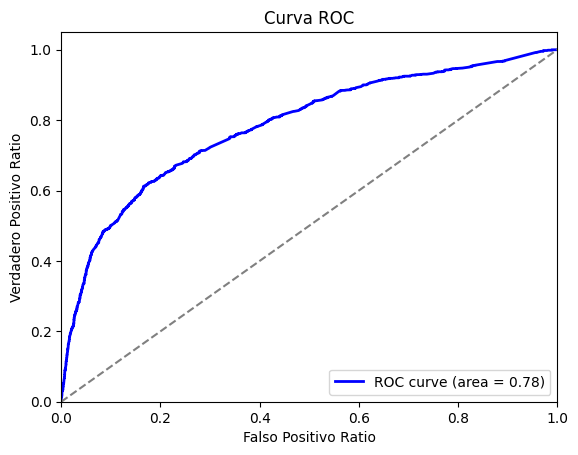

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_true = tad_train[tgt]
y_scores = model.predict_proba(tad_train[varw])[:,1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Falso Positivo Ratio")
plt.ylabel("Verdadero Positivo Ratio")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

#Validación

##TAD_validación

In [ ]:
#X_test.shape,y_test.shape

In [ ]:
'''ros= RandomOverSampler(random_state=1)
X_test,y_test=ros.fit_resample(X_test[var],y_test)
#data_test = pd.concat([X_test, y_test], axis=1)
#data_test.shape, data_test['Churn'].value_counts(1)'''

"ros= RandomOverSampler(random_state=1)\nX_test,y_test=ros.fit_resample(X_test[var],y_test)\n#data_test = pd.concat([X_test, y_test], axis=1)\n#data_test.shape, data_test['Churn'].value_counts(1)"

In [ ]:
data_test=pd.read_csv('/content/drive/MyDrive/Examen1/val_default.csv',sep='|')


In [ ]:
var_ord= ['AGE','LIMIT_BAL','BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
          'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
var_cat = [col for col in list(df.columns) if col not in var_ord+[tgt]+[um]]

In [ ]:
for v in var_cat:
    # Apply normalizar and update data_ros_processed with the new normalized column
    # The function returns a new DataFrame, so we need to ensure the columns are merged correctly
    # For simplicity, we will assume normalizar returns the entire DataFrame with the new column
    # and assign the result back to data_ros_processed
    data_test = normalizar(data_test, v, 0.05)
    # You can inspect the new column if needed:
    # display(data_ros_processed[f'n_{v}'].value_counts(normalize=True))



In [ ]:
best_d = [v for v in best_var if 'd_' in v]
best_d
kb_list=[kb_dictionary.get(v) for v in best_d]

In [ ]:
'''def discretizar_1(df_aux, v, k):
  df_aux = data_test.copy()
  # Asegurar que no haya valores NaN antes de discretizar
  df_aux[v] = pd.to_numeric(df_aux[v], errors='coerce')
  df_aux = df_aux.dropna(subset=[v])

  bins = kb_list[k].bin_edges_[0]
  df_aux[f'd_{v}_{4}'] = pd.cut(df_aux[v], bins=bins, include_lowest=True).astype(str)
  return df_aux'''

"def discretizar_1(df_aux, v, k):\n  df_aux = data_test.copy()\n  # Asegurar que no haya valores NaN antes de discretizar\n  df_aux[v] = pd.to_numeric(df_aux[v], errors='coerce')\n  df_aux = df_aux.dropna(subset=[v])\n\n  bins = kb_list[k].bin_edges_[0]\n  df_aux[f'd_{v}_{4}'] = pd.cut(df_aux[v], bins=bins, include_lowest=True).astype(str)\n  return df_aux"

In [ ]:
n_var = list(filter(lambda s: 'n_' in s, best_gen_vars))
var_ord_test= [v for v in best_gen_vars if v not in n_var]

In [ ]:
'''k=0
for v in var_ord_test:
  data_test=discretizar_3(data_test, v, k)
  k=k+1'''

'k=0\nfor v in var_ord_test:\n  data_test=discretizar_3(data_test, v, k)\n  k=k+1'

In [ ]:
def discretizar_3(df_aux, v, k):
  df_aux = data_test.copy()
  # Asegurar que no haya valores NaN antes de discretizar
  df_aux[v] = pd.to_numeric(df_aux[v], errors='coerce')
  df_aux = df_aux.dropna(subset=[v])

  bins = kb_list[k].bin_edges_[0]
  df_aux[f'd_{v}_{kb_list[k].n_bins}'] = pd.cut(df_aux[v], bins=bins, include_lowest=True).astype(str)
  return df_aux

In [ ]:
k=0
for v in var_ord_test:
  data_test=discretizar_3(data_test, v, k)
  k=k+1

In [ ]:
'''for v, mapa in mapa_woe:
    # Ensure the column exists before trying to access it
    if v not in data_test.columns:
        print(f"Warning: Column '{v}' not found in data_test. Skipping WOE transformation for this variable.")
        # Create the 'w_' column with NaNs if the source column is missing, to avoid later errors
        data_test['w_'+v] = np.nan
        continue

    # Apply the WOE mapping using .map().
    # This will produce NaN for any values in data_test[v] that are not keys in 'mapa'.
    data_test['w_'+v] = data_test[v].map(mapa)

    # Fill NaN values with 0. These NaNs can result from:
    # 1. Categories in data_test[v] that were not present in the training 'mapa'.
    # 2. Actual NaN values in data_test[v] that were not handled by previous fillna logic.
    data_test['w_'+v].fillna(0, inplace=True)'''

SyntaxError: incomplete input (ipython-input-1226320519.py, line 1)

In [ ]:
for v, mapa in mapa_woe:
    data_test['w_'+v] = data_test[v].replace(mapa)

/tmp/ipython-input-1606557835.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test['w_'+v] = data_test[v].replace(mapa)
/tmp/ipython-input-1606557835.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test['w_'+v] = data_test[v].replace(mapa)
/tmp/ipython-input-1606557835.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futu

In [ ]:
tad_test=data_test[varw]

In [ ]:
y_scores = model.predict_proba(tad_test)

In [ ]:
y_pred=model.predict(tad_test)

In [ ]:
data_zipped = list(zip(data_test['CUSTOMER_ID'], y_pred))
df_from_zipped = pd.DataFrame(data_zipped, columns=['CUSTOMER_ID', 'y_hat'])

In [ ]:
df_from_zipped

,CUSTOMER_ID,y_hat
0,6987,0
1,8727,1
2,24669,1
3,17951,0
4,22159,0
...,...,...
1870,24917,0
1871,6267,0
1872,21721,0
1873,11194,1


In [ ]:
output_filename = 'BernardinoHerreraIvan_DefaultPayment.csv'
df_from_zipped.to_csv(output_filename, index=False)

In [ ]:
y_scores

array([[0.74314642, 0.25685358],
       [0.16939762, 0.83060238],
       [0.33236923, 0.66763077],
       ...,
       [0.69750268, 0.30249732],
       [0.3690612 , 0.6309388 ],
       [0.60608574, 0.39391426]])

##Resultados

In [ ]:
y_true = tad_test['Churn']
y_scores = model.predict_proba(tad_test[varw])[:,1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Falso Positivo Ratio")
plt.ylabel("Verdadero Positivo Ratio")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

#Scoring

In [ ]:
pdo = 30
base_score = 150 #"Media"
base_odds = 100 #"Varianza"
factor = pdo/np.log(2)
offset = base_score - (factor - np.log(base_odds))
m = len(varw)

In [ ]:
alpha = model.intercept_
betas = model.coef_[0]

In [ ]:
for feat, beta in zip(varw, betas):
    tad_test["P_" + feat[2:]] = tad_test[feat].apply(lambda x:((-beta*x + (alpha/m))*factor) + (offset/m)).astype(int)

NameError: name 'tad_test' is not defined

In [ ]:
for feat, beta in zip(varw, betas):
    tad_train["P_" + feat[2:]] = tad_train[feat].apply(lambda x:((-beta*x + (alpha/m))*factor) + (offset/m)).astype(int)

/tmp/ipython-input-597881492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tad_train["P_" + feat[2:]] = tad_train[feat].apply(lambda x:((-beta*x + (alpha/m))*factor) + (offset/m)).astype(int)
/tmp/ipython-input-597881492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tad_train["P_" + feat[2:]] = tad_train[feat].apply(lambda x:((-beta*x + (alpha/m))*factor) + (offset/m)).astype(int)
/tmp/ipython-input-597881492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [ ]:
tad_train

,w_n_PAY_0,w_n_PAY_2,w_n_PAY_3,w_n_PAY_4,w_n_PAY_5,w_n_PAY_6,default.payment.next.month,P_n_PAY_0,P_n_PAY_2,P_n_PAY_3,P_n_PAY_4,P_n_PAY_5,P_n_PAY_6
0,0.298239,0.293965,0.399116,0.376125,0.338036,-1.262707,0,28,20,23,20,21,5
1,0.706998,0.433239,0.278431,0.203702,0.163127,0.146171,0,42,21,21,19,19,20
2,0.298239,0.293965,0.399116,0.376125,0.338036,0.347470,0,28,20,23,20,21,22
3,0.706998,0.433239,0.278431,0.203702,0.163127,0.146171,1,42,21,21,19,19,20
4,0.706998,0.433239,0.278431,0.203702,0.163127,0.146171,0,42,21,21,19,19,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8721,0.706998,0.433239,-1.399758,0.203702,0.163127,0.146171,1,42,21,2,19,19,20
8722,-2.138090,-1.577025,-1.399758,-1.384427,-1.456051,-1.262707,1,-52,8,2,11,8,5
8723,-2.138090,0.433239,0.278431,0.203702,0.163127,0.146171,1,-52,21,21,19,19,20
8724,0.706998,0.433239,0.278431,-1.384427,-1.456051,-2.231711,1,42,21,21,11,8,-4


In [ ]:
tad_train["score"] = tad_train[[x for x in tad_train.columns if x.startswith("P_")]].sum(axis = 1)

/tmp/ipython-input-2714740799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tad_train["score"] = tad_train[[x for x in tad_train.columns if x.startswith("P_")]].sum(axis = 1)


In [ ]:
tad_train

,w_n_PAY_0,w_n_PAY_2,w_n_PAY_3,w_n_PAY_4,w_n_PAY_5,w_n_PAY_6,default.payment.next.month,P_n_PAY_0,P_n_PAY_2,P_n_PAY_3,P_n_PAY_4,P_n_PAY_5,P_n_PAY_6,score
0,0.298239,0.293965,0.399116,0.376125,0.338036,-1.262707,0,28,20,23,20,21,5,117
1,0.706998,0.433239,0.278431,0.203702,0.163127,0.146171,0,42,21,21,19,19,20,142
2,0.298239,0.293965,0.399116,0.376125,0.338036,0.347470,0,28,20,23,20,21,22,134
3,0.706998,0.433239,0.278431,0.203702,0.163127,0.146171,1,42,21,21,19,19,20,142
4,0.706998,0.433239,0.278431,0.203702,0.163127,0.146171,0,42,21,21,19,19,20,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8721,0.706998,0.433239,-1.399758,0.203702,0.163127,0.146171,1,42,21,2,19,19,20,123
8722,-2.138090,-1.577025,-1.399758,-1.384427,-1.456051,-1.262707,1,-52,8,2,11,8,5,-18
8723,-2.138090,0.433239,0.278431,0.203702,0.163127,0.146171,1,-52,21,21,19,19,20,48
8724,0.706998,0.433239,0.278431,-1.384427,-1.456051,-2.231711,1,42,21,21,11,8,-4,99


In [ ]:
for var in varw:
    display(tad_train[[var, "P_" + var[2:]]].groupby(var).last())

,P_n_PAY_0
w_n_PAY_0,
-2.253578,-56
-2.138090,-52
-0.672669,-3
0.298239,28
0.706998,42
0.944171,50


,P_n_PAY_2
w_n_PAY_2,
-1.679642,8
-1.577025,8
0.293965,20
0.433239,21
0.506492,21


,P_n_PAY_3
w_n_PAY_3,
-1.459906,2
-1.399758,2
0.278431,21
0.399116,23
0.458379,23


,P_n_PAY_4
w_n_PAY_4,
-2.107455,8
-1.384427,11
0.203702,19
0.376125,20
0.390297,20


,P_n_PAY_5
w_n_PAY_5,
-2.066863,3
-1.456051,8
0.163127,19
0.338036,21
0.368194,21


,P_n_PAY_6
w_n_PAY_6,
-2.231711,-4
-1.262707,5
0.146171,20
0.265872,21
0.347470,22
